In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import phylopandas as ph
%matplotlib inline


In [2]:
sns.set(style = 'white',context= 'notebook', rc = {'figure.figsize':(14,10)})

In [ ]:
#NCBI Data
df = ph.read_fasta('sequences_new.fasta')
df

In [4]:
#Split sequences in dimensions
new = df['sequence'].str.split("", n=-1, expand = True)
new

,0,1,2,3,4,5,6,7,8,9,...,37963,37964,37965,37966,37967,37968,37969,37970,37971,37972
0,,A,T,T,A,A,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
1,,A,T,A,T,T,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
2,,A,C,C,T,T,C,C,C,A,...,None,None,None,None,None,None,None,None,None,None
3,,A,T,T,A,A,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
4,,A,A,G,G,T,T,T,A,T,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,,C,A,G,A,G,C,C,A,T,...,None,None,None,None,None,None,None,None,None,None
9889,,A,T,A,T,T,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
9890,,C,T,A,C,C,C,A,G,G,...,None,None,None,None,None,None,None,None,None,None
9891,,C,A,G,A,G,C,C,A,T,...,None,None,None,None,None,None,None,None,None,None


In [6]:
#Dimension-split pickle file for further use
new.to_pickle(r'C:\Users\hp\Desktop\IMP Stuff\AlgoAsylum\UMAP\sep.pkl')

In [3]:
#Use pickle file for next runs
new = pd.read_pickle('sep.pkl')


In [4]:
new

,0,1,2,3,4,5,6,7,8,9,...,37963,37964,37965,37966,37967,37968,37969,37970,37971,37972
0,,A,T,T,A,A,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
1,,A,T,A,T,T,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
2,,A,C,C,T,T,C,C,C,A,...,None,None,None,None,None,None,None,None,None,None
3,,A,T,T,A,A,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
4,,A,A,G,G,T,T,T,A,T,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,,C,A,G,A,G,C,C,A,T,...,None,None,None,None,None,None,None,None,None,None
9889,,A,T,A,T,T,A,G,G,T,...,None,None,None,None,None,None,None,None,None,None
9890,,C,T,A,C,C,C,A,G,G,...,None,None,None,None,None,None,None,None,None,None
9891,,C,A,G,A,G,C,C,A,T,...,None,None,None,None,None,None,None,None,None,None


In [5]:
#data = new.iloc[:,0:10001]
#data[0] = add[2]

In [7]:
#Extract location from description column
add = df['description'].str.split("|", n = -1, expand = True)

In [6]:
#data[10].unique()

array(['T', 'G', 'A', 'C', '', 'Y', 'N', 'W', 'H', 'S', -1], dtype=object)

In [3]:
#UMAP Setup
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
reducer = umap.UMAP()

In [36]:
#Temporary run - skip
prescale = data.iloc[:,1:10001].values
scaled= StandardScaler().fit_transform(prescale)

In [37]:
#Temporary run - skip
embedding = reducer.fit_transform(scaled)
embedding.shape

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(9893, 2)

In [8]:
#Label encoding geo-location
from numpy import array
from sklearn.preprocessing import LabelEncoder
add["Loc"] = add[2]
le1 = LabelEncoder()
ie1= le1.fit_transform(array(add['Loc']))
add['Loc']= pd.DataFrame(ie1)
add['Loc'] = add['Loc'].astype('int')
add['Loc'].unique()

array([ 7,  5, 23, 42, 51, 10, 17, 50,  2,  6, 43, 18,  1, 48, 16, 37,  0,
       38, 21, 46, 13, 49, 31, 35, 28, 39, 25, 32,  9, 30, 22, 47, 53, 12,
        8, 14, 15, 54, 24, 36, 44, 27,  4, 41, 19, 20, 33, 55, 45,  3, 29,
       34, 11, 56, 26, 52, 40])

Text(0.5, 1.0, 'UMAP projection ')

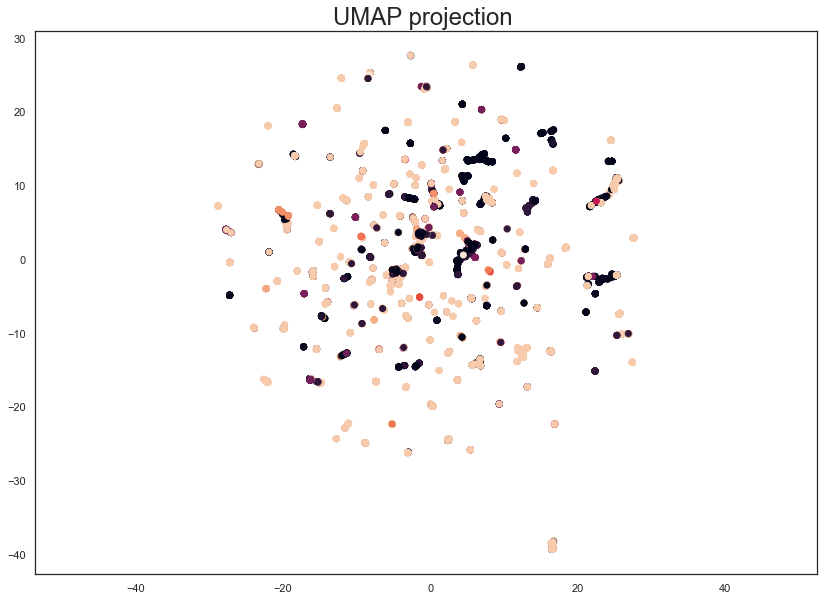

In [38]:
#Temporary run - skip
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=add['Loc'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection ', fontsize=24)

In [39]:
new

,0,1,2,3,4,5,6,7,8,9,...,37963,37964,37965,37966,37967,37968,37969,37970,37971,37972
0,,A,T,T,A,A,A,G,G,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,,A,T,A,T,T,A,G,G,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,,A,C,C,T,T,C,C,C,A,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,,A,T,T,A,A,A,G,G,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,,A,A,G,G,T,T,T,A,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,,C,A,G,A,G,C,C,A,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9889,,A,T,A,T,T,A,G,G,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9890,,C,T,A,C,C,C,A,G,G,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9891,,C,A,G,A,G,C,C,A,T,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [9]:
#Main Run
data = new.iloc[:,0:20001]

In [11]:
#Error Filtering #### Not errors - expand later
#new.astype('str')

new = new.fillna(np.nan)
''' 
data =data.replace('K',np.nan)
data =data.replace('M',np.nan)
data =data.replace('N',np.nan)

data =data.replace('R',np.nan)
data =data.replace('S',np.nan)

data =data.replace('V',np.nan)
data =data.replace('W',np.nan)
data =data.replace('Y',np.nan)

data =data.replace('',np.nan)
'''
#Add Location column at the end
data[0] = add[2]
data

,0,1,2,3,4,5,6,7,8,9,...,19991,19992,19993,19994,19995,19996,19997,19998,19999,20000
0,China,A,T,T,A,A,A,G,G,T,...,A,T,G,G,T,A,G,A,G,T
1,Canada,A,T,A,T,T,A,G,G,T,...,A,G,T,C,A,A,A,G,G,T
2,Japan,A,C,C,T,T,C,C,C,A,...,T,G,G,T,C,A,A,G,T,A
3,Japan,A,T,T,A,A,A,G,G,T,...,A,T,G,G,T,A,G,A,G,T
4,Japan,A,A,G,G,T,T,T,A,T,...,T,A,G,A,G,T,T,G,A,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,,C,A,G,A,G,C,C,A,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9889,,A,T,A,T,T,A,G,G,T,...,A,G,T,C,A,A,A,G,G,T
9890,China,C,T,A,C,C,C,A,G,G,...,A,C,C,T,T,C,A,A,A,G
9891,Viet Nam,C,A,G,A,G,C,C,A,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#One-hot encode
trial = pd.get_dummies(data.iloc[:,1:10001], dummy_na =True)

In [15]:
#scale values - optional
prescale = trial.values
scaled= StandardScaler().fit_transform(prescale)

In [16]:
#direct run unscale values
reducer = umap.UMAP(n_neighbors = 20)
embedding = reducer.fit_transform(trial)
embedding.shape

C:\Python\Python37\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


(9893, 2)

Text(0.5, 1.0, 'UMAP projection ')

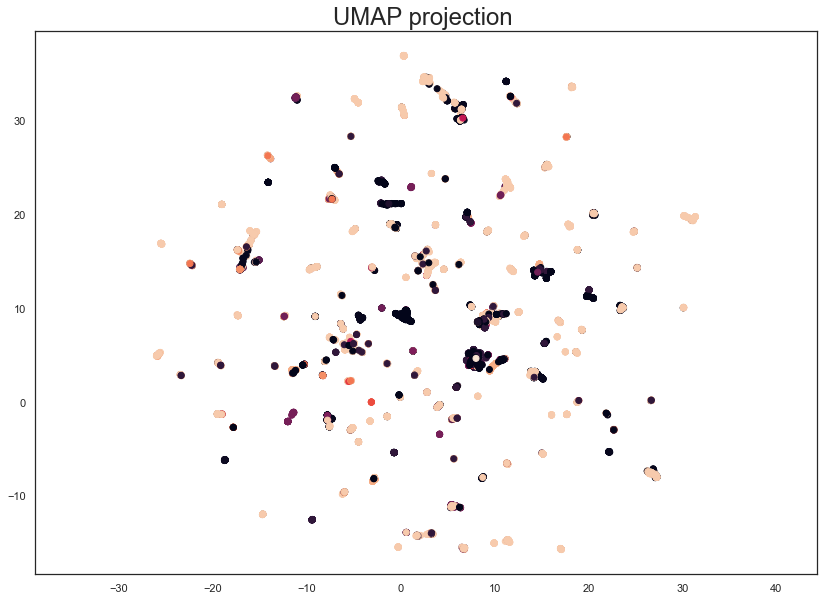

In [42]:
#n = 15 run
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=add['Loc'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection ', fontsize=24)

scaled

Text(0.5, 1.0, 'UMAP projection n= 20')

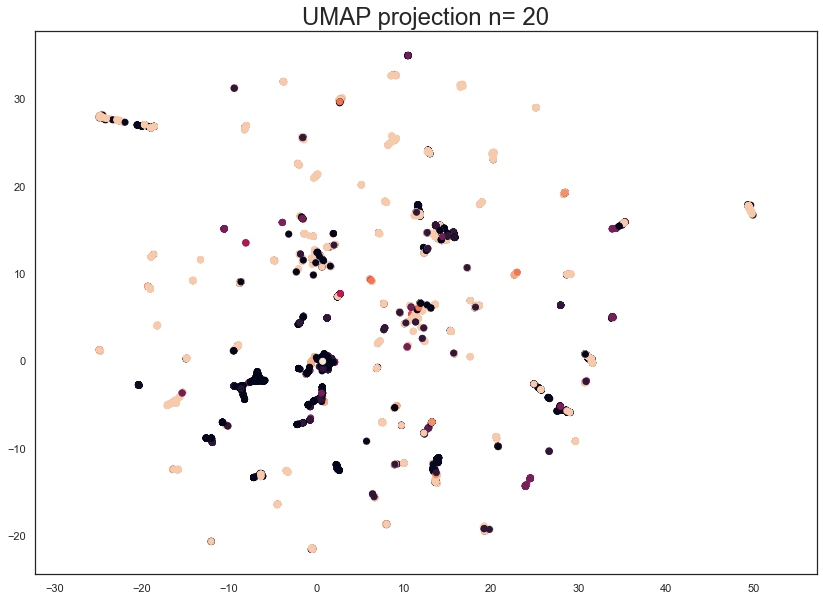

In [17]:
#n = 20 run
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=add['Loc'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection n= 20', fontsize=24)

In [19]:
#n = 25 
reducer25 = umap.UMAP(n_neighbors = 25)
embedding25 = reducer.fit_transform(trial)
embedding25.shape

(9893, 2)

Text(0.5, 1.0, 'UMAP projection n= 25')

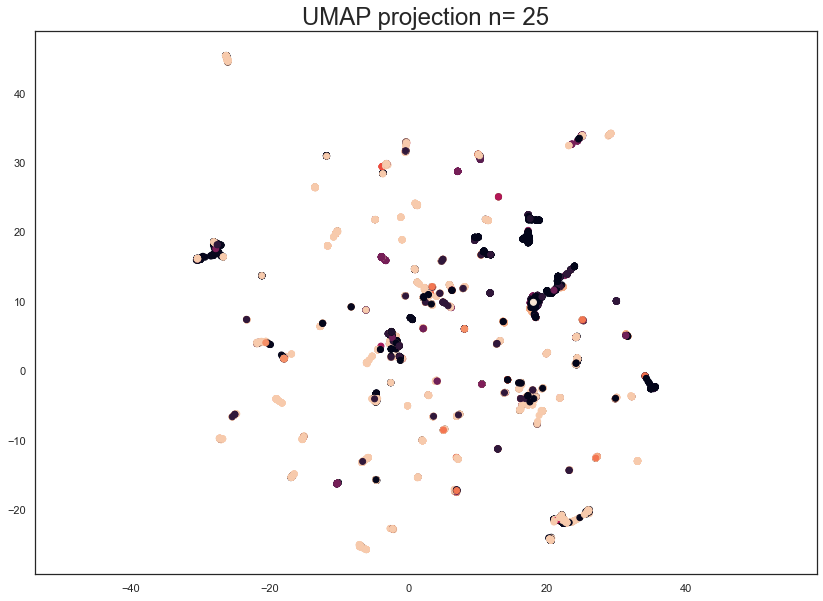

In [20]:
#n= 25 run
plt.scatter(
    embedding25[:, 0],
    embedding25[:, 1],
    c=add['Loc'])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection n= 25', fontsize=24)